In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Make the plots appear inline 
%matplotlib inline

plt.rc('text', usetex=False)

file_name = r'ca_results_9-30-20.csv' # Name of csv file containing results. Must contain header row.

in_data = pd.read_csv(file_name) # read in the data

pix_to_um = 0.512 # the SHG images have a resolution of 0.512um/pixel. Resolution is isotropic.

# Convert the length and width values to microns
in_data['Length'] *= pix_to_um
in_data['Width'] *= pix_to_um

in_data.describe() # A summary of the data

,ROI,Layer,Angle,Width,Length,Straightness
count,12709.000000,12709.000000,12709.000000,12709.000000,12709.000000,12709.000000
mean,4.210323,2.556849,-33.079544,2.845434,48.225819,0.931012
std,2.459697,1.117160,36.030524,0.752245,46.252522,0.050291
min,1.000000,1.000000,-89.869752,1.012260,15.360307,0.178281
25%,2.000000,2.000000,-73.377832,2.295731,21.026632,0.913565
50%,4.000000,3.000000,-10.706264,2.763858,31.652817,0.943879
75%,6.000000,4.000000,-0.792830,3.296459,56.768598,0.964193
max,11.000000,4.000000,76.471401,6.960053,583.532542,1.000000


Text(0, 0.5, 'Straightness')

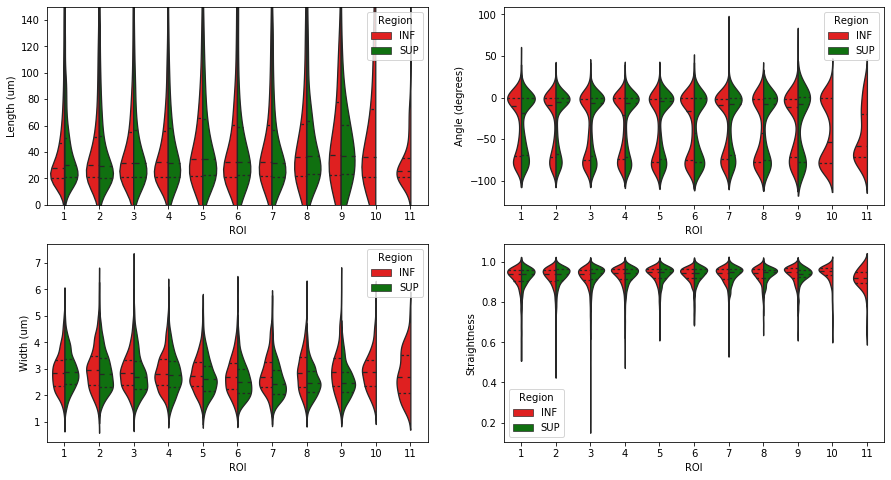

In [2]:
# Create a violin plot to show the distributions of the
# the fiber parameter estimates by ROI, where the left side of the 'violin' corresponds to the inferior region and
# the right side is the superior region
# The figure will contain four subplots.
# To this end, label the data frames
v_fig, ax = plt.subplots(2,2,figsize=(15,8))
sns.violinplot(x="ROI", y="Length", hue="Region", 
               data=in_data, split=True, inner="quart", linewidth=1.3,
               palette={"INF": "red", "SUP": "green"}, ax=ax[0,0])
ax[0,0].set_ylabel('Length (um)')
ax[0,0].set_ylim([0, 150])

sns.violinplot(x="ROI", y="Angle", hue="Region", 
               data=in_data, split=True, inner="quart", linewidth=1.3,
               palette={"INF": "red", "SUP": "green"}, ax=ax[0,1])
ax[0,1].set_ylabel('Angle (degrees)')

sns.violinplot(x="ROI", y="Width", hue="Region", 
               data=in_data, split=True, inner="quart", linewidth=1.3,
               palette={"INF": "red", "SUP": "green"}, ax=ax[1,0])
ax[1,0].set_ylabel('Width (um)')

sns.violinplot(x="ROI", y="Straightness", hue="Region", 
               data=in_data, split=True, inner="quart", linewidth=1.3,
               palette={"INF": "red", "SUP": "green"}, ax=ax[1,1])
ax[1,1].set_ylabel('Straightness')

(0, 150)

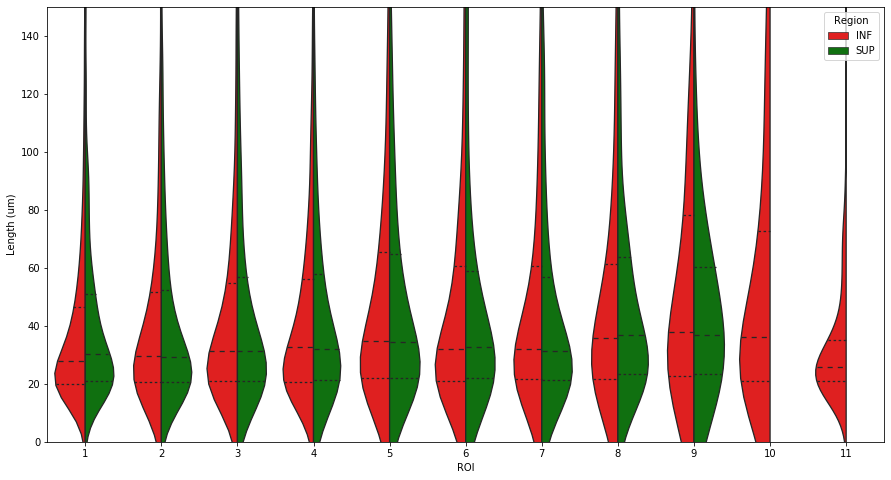

In [3]:
# Create a violin plot for the fiber length only
v_fig, ax = plt.subplots(1,1,figsize=(15,8))
sns.violinplot(x="ROI", y="Length", hue="Region", 
               data=in_data, split=True, inner="quart", linewidth=1.3,
               palette={"INF": "red", "SUP": "green"}, ax=ax)
ax.set_ylabel('Length (um)')
ax.set_ylim([0, 150]) # I chose the limits to focus on the bulk of the distributions
# v_fig.savefig(r'length_violin_INF-SUP.png',dpi=300) # Uncomment to save the figure as a PNG image